<a href="https://colab.research.google.com/github/GiulioCMSanto/HDSIdent/blob/master/notebooks/MIMO%20Systems/Segmentation/mimo_statistical_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical Methodo for Multivariable Systems

[HDSIdent: Historical Data Segmentation for System Identification](https://github.com/GiulioCMSanto/HDSIdent)

This notebook explores how to obtain intervals suitable for system identification through a statistical method, considering multivariable systems.

**NOTICE: this notebook, as well as the related dataset, is part of my masters dissertation, which was not yet published. Therefore, referencing is not permited until the work is available.**

_**Related works**_:

```
WANG, J. et al. Searching historical data segments for process
identification in feedback control loops. Computers and Chemical
Engineering, v. 112, n. 6, p. 6–16, 2018.
```




In [1]:
!git clone https://github.com/GiulioCMSanto/HDSIdent.git

Cloning into 'HDSIdent'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 602 (delta 37), reused 93 (delta 30), pack-reused 491
Receiving objects: 100% (602/602), 3.80 MiB | 22.62 MiB/s, done.
Resolving deltas: 100% (269/269), done.


In [2]:
# Change into the directory for install
%cd HDSIdent/

/content/HDSIdent


In [3]:
!python setup.py install

running install
running bdist_egg
running egg_info
creating HDSIdent.egg-info
writing HDSIdent.egg-info/PKG-INFO
writing dependency_links to HDSIdent.egg-info/dependency_links.txt
writing requirements to HDSIdent.egg-info/requires.txt
writing top-level names to HDSIdent.egg-info/top_level.txt
writing manifest file 'HDSIdent.egg-info/SOURCES.txt'
writing manifest file 'HDSIdent.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/HDSIdent
copying HDSIdent/__init__.py -> build/lib/HDSIdent
creating build/bdist.linux-x86_64
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/HDSIdent
copying build/lib/HDSIdent/__init__.py -> build/bdist.linux-x86_64/egg/HDSIdent
byte-compiling build/bdist.linux-x86_64/egg/HDSIdent/__init__.py to __init__.cpython-36.pyc
creating build/bdist.linux-x86_64/egg/EGG-INFO
copying HDSIdent.egg-info/PKG-INFO -> build/bdist.linu

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

import plotly
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

plotly.io.renderers.default = 'colab'

%matplotlib inline
sns.set_style('darkgrid')

In [6]:
from HDSIdent.data_treatment.data_preprocessing import Preprocessing
from HDSIdent.initial_intervals.non_parametric_pettitt import PettittMethod
from HDSIdent.segmentation_methods.statistical_segmentation import MIMOStatistical

## **1. Read Data**

In [7]:
u1_url = "https://raw.githubusercontent.com/GiulioCMSanto/HDSIdent/master/data/distillation_column/mimo_simu_u1.csv"
u2_url = "https://raw.githubusercontent.com/GiulioCMSanto/HDSIdent/master/data/distillation_column/mimo_simu_u2.csv"
y1_url = "https://raw.githubusercontent.com/GiulioCMSanto/HDSIdent/master/data/distillation_column/mimo_simu_y1.csv"
y2_url = "https://raw.githubusercontent.com/GiulioCMSanto/HDSIdent/master/data/distillation_column/mimo_simu_y2.csv"

In [8]:
u1 = pd.read_csv(u1_url, error_bad_lines=False, header=None)
u2 = pd.read_csv(u2_url, error_bad_lines=False, header=None)
y1 = pd.read_csv(y1_url, error_bad_lines=False, header=None)
y2 = pd.read_csv(y2_url, error_bad_lines=False, header=None)

## **2. Data Preprocessing**

In [9]:
pp = Preprocessing(
        scaler='MinMaxScaler',
        feature_range=(-0.5,0.5),
        k=100);

In [10]:
X_clean, Y_clean = pp.fit_transform(X=np.concatenate([u1,u2],axis=1),
                                    y=np.concatenate([y1,y2],axis=1))

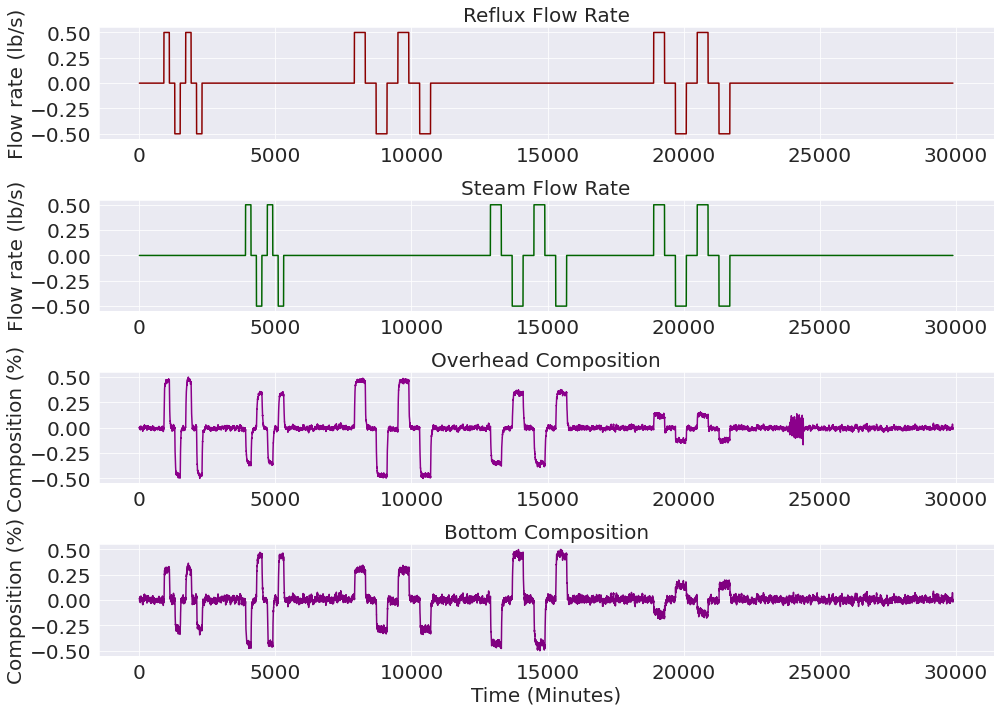

In [11]:
plt.figure(figsize=(14,10));

plt.subplot(4,1,1);
plt.plot(X_clean[:,0], color='darkred');
plt.title("Reflux Flow Rate", fontsize=20);
plt.ylabel("Flow rate (lb/s)", fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

plt.subplot(4,1,2);
plt.plot(X_clean[:,1], color='darkgreen');
plt.title("Steam Flow Rate", fontsize=20);
plt.ylabel("Flow rate (lb/s)", fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

plt.subplot(4,1,3);
plt.plot(Y_clean[:,0], color='darkmagenta');
plt.title("Overhead Composition", fontsize=20);
plt.ylabel("Composition (%)", fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

plt.subplot(4,1,4);
plt.plot(Y_clean[:,1],  color='purple');
plt.title("Bottom Composition", fontsize=20);
plt.ylabel("Composition (%)", fontsize=20);
plt.xlabel("Time (Minutes)", fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

plt.tight_layout();

In [12]:
df = pd.DataFrame()
df['U1'] = np.squeeze(X_clean[:,0])
df['U2'] = np.squeeze(X_clean[:,1])
df['Y1'] = np.squeeze(Y_clean[:,0])
df['Y2'] = np.squeeze(Y_clean[:,1])

## **3. Initial Intervals**

In [13]:
PM = PettittMethod(
        alpha=0.05,
        min_length_to_split=500,
        split_size=100,
        verbose=0,
        n_jobs=1
    )

pm_initial_segments = PM.fit(X=df[['U1','U2']],
                             y=df[['Y1','Y2']]);

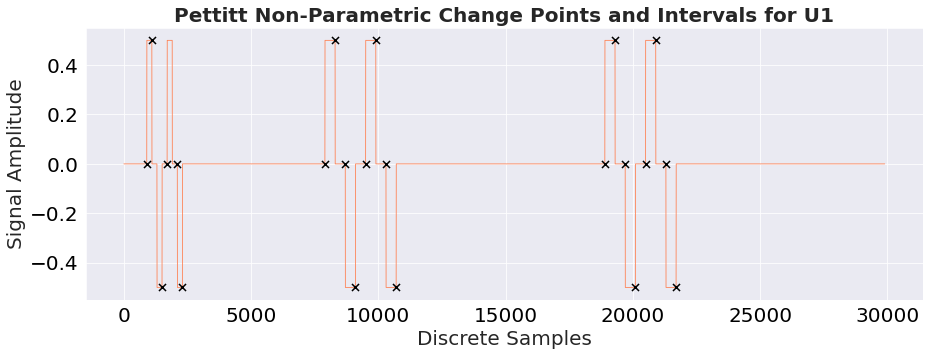

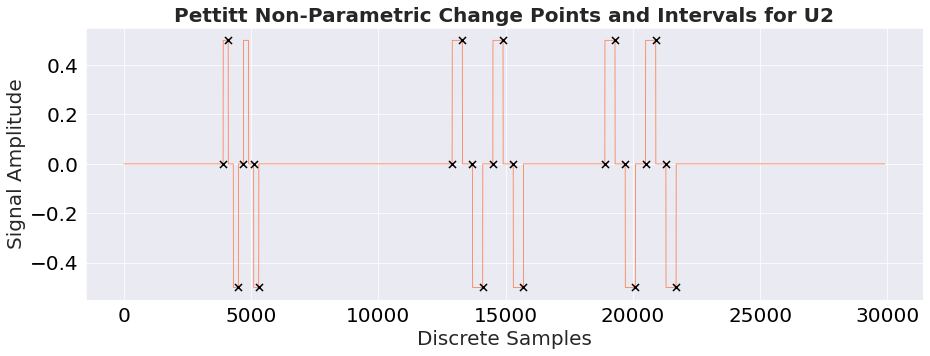

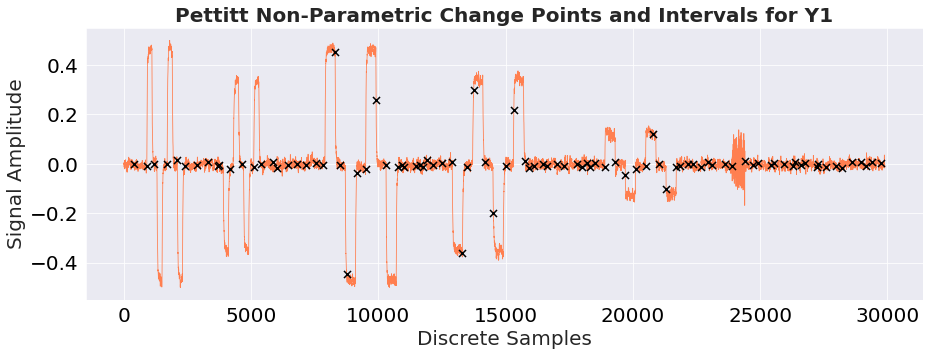

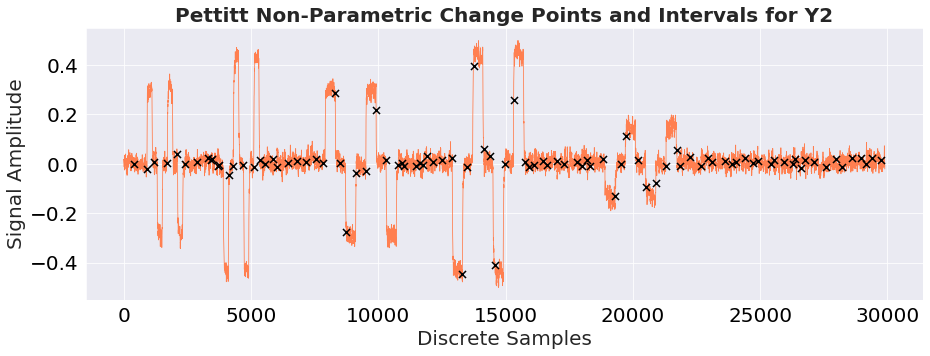

In [14]:
PM.plot_change_points(X=df[['U1','U2']],y=df[['Y1','Y2']],divided_data=False)

## **4. Statistical Segmentation**

### **4.1 Case 1: At least one input-output pair must satisfy the statistical criteria**

In [23]:
MS = MIMOStatistical(
        initial_intervals=pm_initial_segments,
        ks_critic=1.25,
        compare_means=True,
        insert_noise_sp=True, 
        mean_delta=0.1,
        noise_std=0.01
     )

In [24]:
segments = MS.fit(X=df[['U1','U2']],
                  y=df[['Y1','Y2']]);

In [25]:
indicating_sequence = np.ones(len(y1))*(-0.5)
for idx in MS.final_segments:
    indicating_sequence[idx] = 0.5

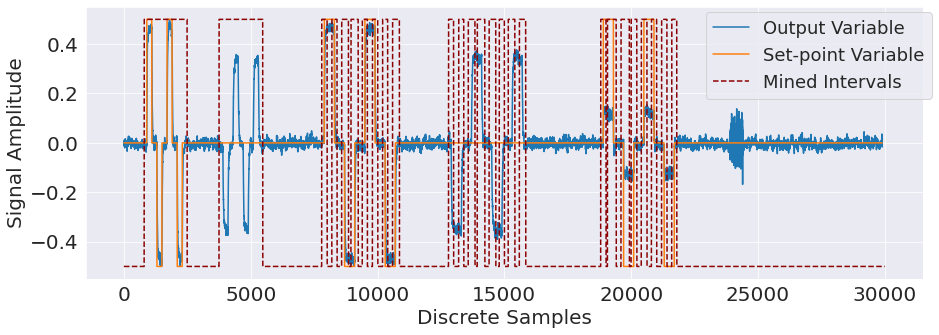

In [26]:
plt.figure(figsize=(15,5));
plt.plot(df[['Y1']], label="Output Variable");
plt.plot(df[['U1']], label="Set-point Variable");
plt.plot(indicating_sequence, color='darkred', linestyle='--', label="Mined Intervals");
plt.legend(fontsize=18,bbox_to_anchor=(0.73,0.63));
plt.xlabel("Discrete Samples", fontsize=20);
plt.ylabel("Signal Amplitude", fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

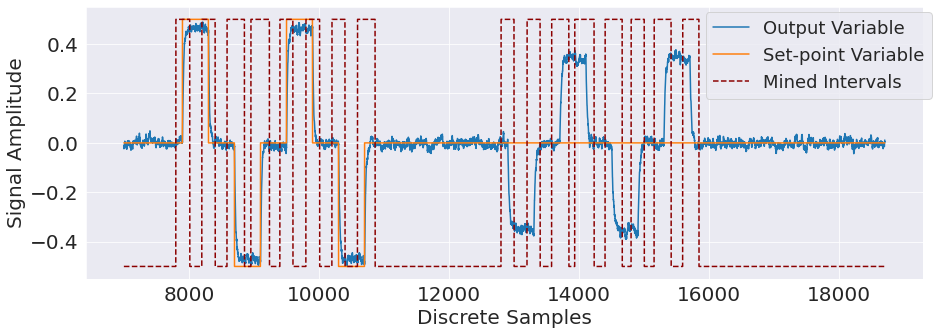

In [27]:
plt.figure(figsize=(15,5));
plt.plot(df[['Y1']].iloc[7000:18700], label="Output Variable");
plt.plot(df[['U1']].iloc[7000:18700], label="Set-point Variable");
plt.plot(range(7000,18700),indicating_sequence[7000:18700], color='darkred', linestyle='--', label="Mined Intervals");
plt.legend(fontsize=18,bbox_to_anchor=(0.73,0.63));
plt.xlabel("Discrete Samples", fontsize=20);
plt.ylabel("Signal Amplitude", fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);

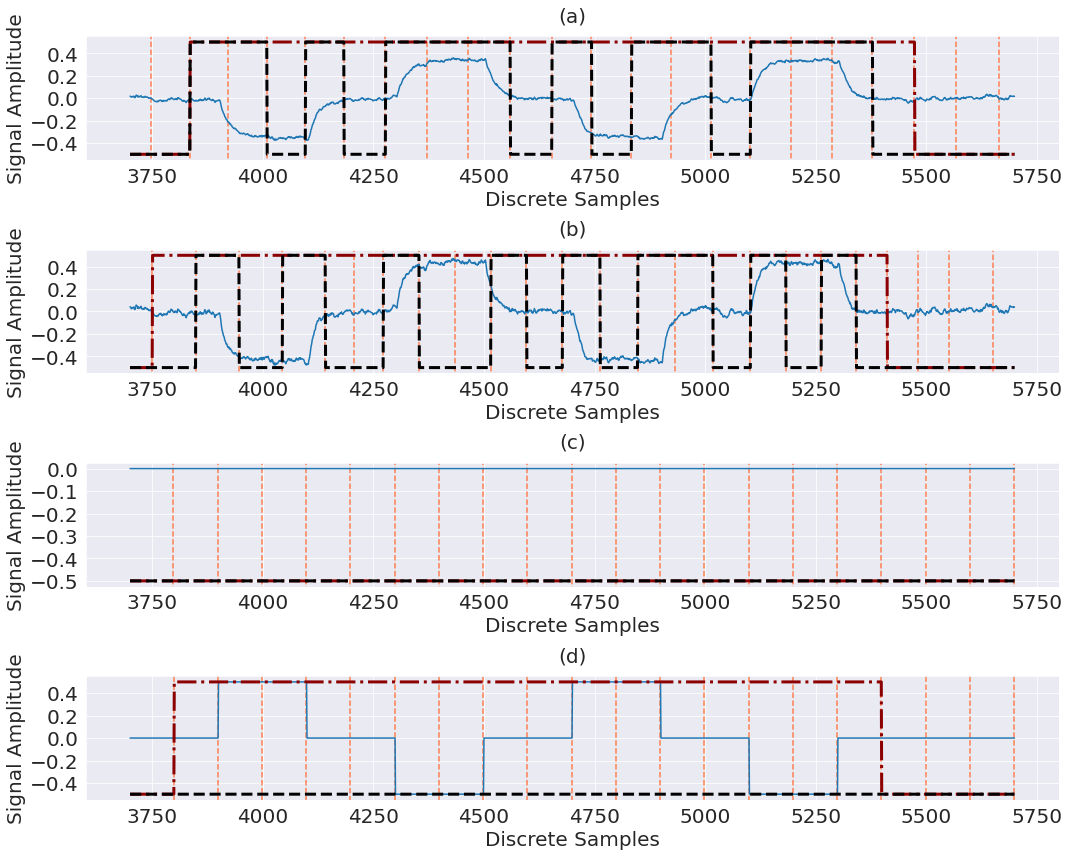

In [28]:
plt.figure(figsize=(15,12))

plt.subplot(4,1,1)
change_points_ex = []
for idx in range(0,len(pm_initial_segments['Y1'])):
    if (np.max(pm_initial_segments['Y1'][idx]) >= 3700 and
        np.max(pm_initial_segments['Y1'][idx]) <= 5700):
    
        change_points_ex.append(np.max(pm_initial_segments['Y1'][idx]))
        

for cp in change_points_ex:
    plt.axvline(cp,ymin=-0.5,ymax=1,color='coral', linestyle='--')
    
plt.plot(range(3700,5700),df[['Y1']].values[3700:5700]);
ks_indicating_example = MS.ks_indicating_sequences['output']['Y1'][3700:5700]
ts_indicating_example = MS.ts_indicating_sequences['output']['Y1'][3700:5700]

ks_indicating_example[np.argwhere(ks_indicating_example==0)] = -0.5
ks_indicating_example[np.argwhere(ks_indicating_example==1)] = 0.5
ts_indicating_example[np.argwhere(ts_indicating_example==0)] = -0.5
ts_indicating_example[np.argwhere(ts_indicating_example==1)] = 0.5

plt.plot(range(3700,5700),ts_indicating_example, color='darkred', linestyle='-.',linewidth=3)
plt.plot(range(3700,5700),ks_indicating_example, color='black', linestyle='--',linewidth=3)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel("Discrete Samples", fontsize=20);
plt.ylabel("Signal Amplitude", fontsize=20);
plt.title("(a)",fontsize=20, pad=15);
plt.subplot(4,1,2)

change_points_ex = []
for idx in range(0,len(pm_initial_segments['Y2'])):
    if (np.max(pm_initial_segments['Y2'][idx]) >= 3700 and
        np.max(pm_initial_segments['Y2'][idx]) <= 5700):
    
        change_points_ex.append(np.max(pm_initial_segments['Y2'][idx]))

for cp in change_points_ex:
    plt.axvline(cp,ymin=-0.5,ymax=1,color='coral', linestyle='--')
    
plt.plot(range(3700,5700),df[['Y2']].values[3700:5700]);
ks_indicating_example = MS.ks_indicating_sequences['output']['Y2'][3700:5700]
ts_indicating_example = MS.ts_indicating_sequences['output']['Y2'][3700:5700]

ks_indicating_example[np.argwhere(ks_indicating_example==0)] = -0.5
ks_indicating_example[np.argwhere(ks_indicating_example==1)] = 0.5
ts_indicating_example[np.argwhere(ts_indicating_example==0)] = -0.5
ts_indicating_example[np.argwhere(ts_indicating_example==1)] = 0.5

plt.plot(range(3700,5700),ts_indicating_example, color='darkred', linestyle='-.',linewidth=3)
plt.plot(range(3700,5700),ks_indicating_example, color='black', linestyle='--',linewidth=3)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel("Discrete Samples", fontsize=20);
plt.ylabel("Signal Amplitude", fontsize=20);
plt.title("(b)",fontsize=20, pad=15);

plt.subplot(4,1,3)

change_points_ex = []
for idx in range(0,len(pm_initial_segments['U1'])):
    if (np.max(pm_initial_segments['U1'][idx]) >= 3700 and
        np.max(pm_initial_segments['U1'][idx]) <= 5700):
    
        change_points_ex.append(np.max(pm_initial_segments['U1'][idx]))

for cp in change_points_ex:
    plt.axvline(cp,ymin=-0.5,ymax=1,color='coral', linestyle='--')
    
plt.plot(range(3700,5700),df[['U1']].values[3700:5700]);
ks_indicating_example = MS.ks_indicating_sequences['input']['U1'][3700:5700]
ts_indicating_example = MS.ts_indicating_sequences['input']['U1'][3700:5700]

ks_indicating_example[np.argwhere(ks_indicating_example==0)] = -0.5
ks_indicating_example[np.argwhere(ks_indicating_example==1)] = 0.5
ts_indicating_example[np.argwhere(ts_indicating_example==0)] = -0.5
ts_indicating_example[np.argwhere(ts_indicating_example==1)] = 0.5

plt.plot(range(3700,5700),ts_indicating_example, color='darkred', linestyle='-.',linewidth=3)
plt.plot(range(3700,5700),ks_indicating_example, color='black', linestyle='--',linewidth=3)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel("Discrete Samples", fontsize=20);
plt.ylabel("Signal Amplitude", fontsize=20);
plt.title("(c)",fontsize=20, pad=15);

plt.subplot(4,1,4)

change_points_ex = []
for idx in range(0,len(pm_initial_segments['U2'])):
    if (np.max(pm_initial_segments['U2'][idx]) >= 3700 and
        np.max(pm_initial_segments['U2'][idx]) <= 5700):
    
        change_points_ex.append(np.max(pm_initial_segments['U2'][idx]))

for cp in change_points_ex:
    plt.axvline(cp,ymin=-0.5,ymax=1,color='coral', linestyle='--')
    
plt.plot(range(3700,5700),df[['U2']].values[3700:5700]);
ks_indicating_example = MS.ks_indicating_sequences['input']['U2'][3700:5700]
ts_indicating_example = MS.ts_indicating_sequences['input']['U2'][3700:5700]

ks_indicating_example[np.argwhere(ks_indicating_example==0)] = -0.5
ks_indicating_example[np.argwhere(ks_indicating_example==1)] = 0.5
ts_indicating_example[np.argwhere(ts_indicating_example==0)] = -0.5
ts_indicating_example[np.argwhere(ts_indicating_example==1)] = 0.5

plt.plot(range(3700,5700),ts_indicating_example, color='darkred', linestyle='-.',linewidth=3)
plt.plot(range(3700,5700),ks_indicating_example, color='black', linestyle='--',linewidth=3)
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);
plt.xlabel("Discrete Samples", fontsize=20);
plt.ylabel("Signal Amplitude", fontsize=20);
plt.title("(d)",fontsize=20, pad=15);

plt.tight_layout();

In [29]:
print("Unified segment: [{}, {}]".format(np.min(segments[1]),np.max(segments[1])))

Unified segment: [3751, 5473]


In [30]:
print("U2 segment: [{}, {}]".format(3700+np.min(np.argwhere(MS.indicating_sequences['input']['U2'][3700:5700]==1)),
                                    3700+np.max(np.argwhere(MS.indicating_sequences['input']['U2'][3700:5700]==1))))

U2 segment: [3800, 5398]


### **4.2 Case 2: All inputs and outputs must pass in the statistical tests**

In [33]:
MS = MIMOStatistical(
        initial_intervals=pm_initial_segments,
        ks_critic=1.25,
        compare_means=True,
        insert_noise_sp=True,
        mean_delta=0.1,
        noise_std=0.01,
        min_input_coupling=2,
        min_output_coupling=2
     )

In [34]:
segments = MS.fit(X=df[['U1','U2']],
                  y=df[['Y1','Y2']]);

In [36]:
indicating_sequence = np.ones(len(y1))*(-0.5)
for idx in MS.final_segments:
    indicating_sequence[idx] = 0.5

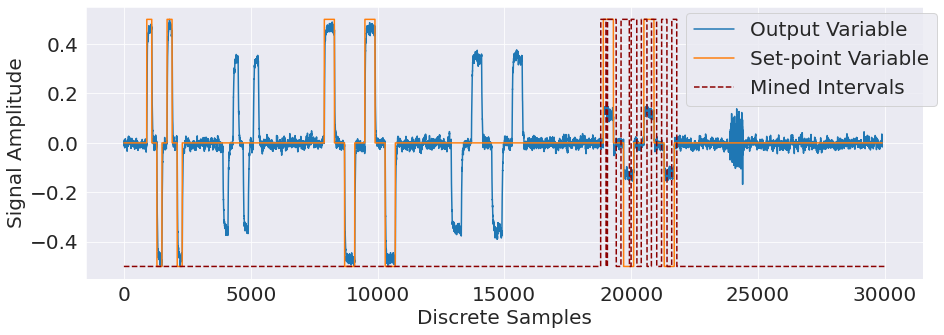

In [37]:
plt.figure(figsize=(15,5));
plt.plot(df[['Y1']], label="Output Variable");
plt.plot(df[['U1']], label="Set-point Variable");
plt.plot(indicating_sequence, color='darkred', linestyle='--', label="Mined Intervals");
plt.legend(fontsize=20,bbox_to_anchor=(0.705,0.6));
plt.xlabel("Discrete Samples", fontsize=20);
plt.ylabel("Signal Amplitude", fontsize=20);
plt.xticks(fontsize=20);
plt.yticks(fontsize=20);